In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])

# Unpack Argument Level data

In [75]:

# ****Path****
fldr = 'bert_epistemology/year2' 


# ****Classifier Parameters****
# set epochs
epochs = 4
# set batch size
batch_size = 16
# set random seed
seed_val = 42
# set learnning rate
lr = 6e-5   # args.learning rate - default is 5e-5

# ****Training Parameters****
# set the number of loops 
run_num = 5
ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
avg_list, seom_list = [], []

for r in ratios:

    # unpack dataframes
    df = pd.read_pickle(r'./Pickledfiles/'+fldr+'/'+str(r)+'trainratio_'+str(run_num)+'runs_'+str(epochs)+'epochs_'+str(batch_size)+'batch_size_'+str(lr)+'lr_'+str(seed_val)+'seed_val_.pkl')
    print(df)
    # df = df.iloc[[3]] # the 3rd row only
    df = df[3::4] # start from the 3rd row, get subsequent 4th row
    accy_list = (df['Valid. Accur.'].tolist())

    # append average and standard error of mean to lists
    avg_list.append(np.average(accy_list))
    seom_list.append( np.std(accy_list, ddof=1) / np.sqrt(np.size(accy_list)) ) 

print(avg_list)
print(seom_list)

       Run Number  Training ratio  Training Loss  Valid. Loss  Valid. Accur.  \
epoch                                                                          
1               4             0.5       0.005856     0.000967       1.000000   
2               4             0.5       0.001817     0.017704       1.000000   
3               4             0.5       0.003424     0.013699       1.000000   
4               4             0.5       0.118858     0.010370       1.000000   
1               3             0.5       0.020761     0.014029       1.000000   
2               3             0.5       0.008567     0.054754       0.979167   
3               3             0.5       0.006670     0.043092       0.979167   
4               3             0.5       0.134424     0.040713       0.979167   
1               2             0.5       0.041384     0.124537       0.945833   
2               2             0.5       0.019212     0.036322       0.966667   
3               2             0.5       

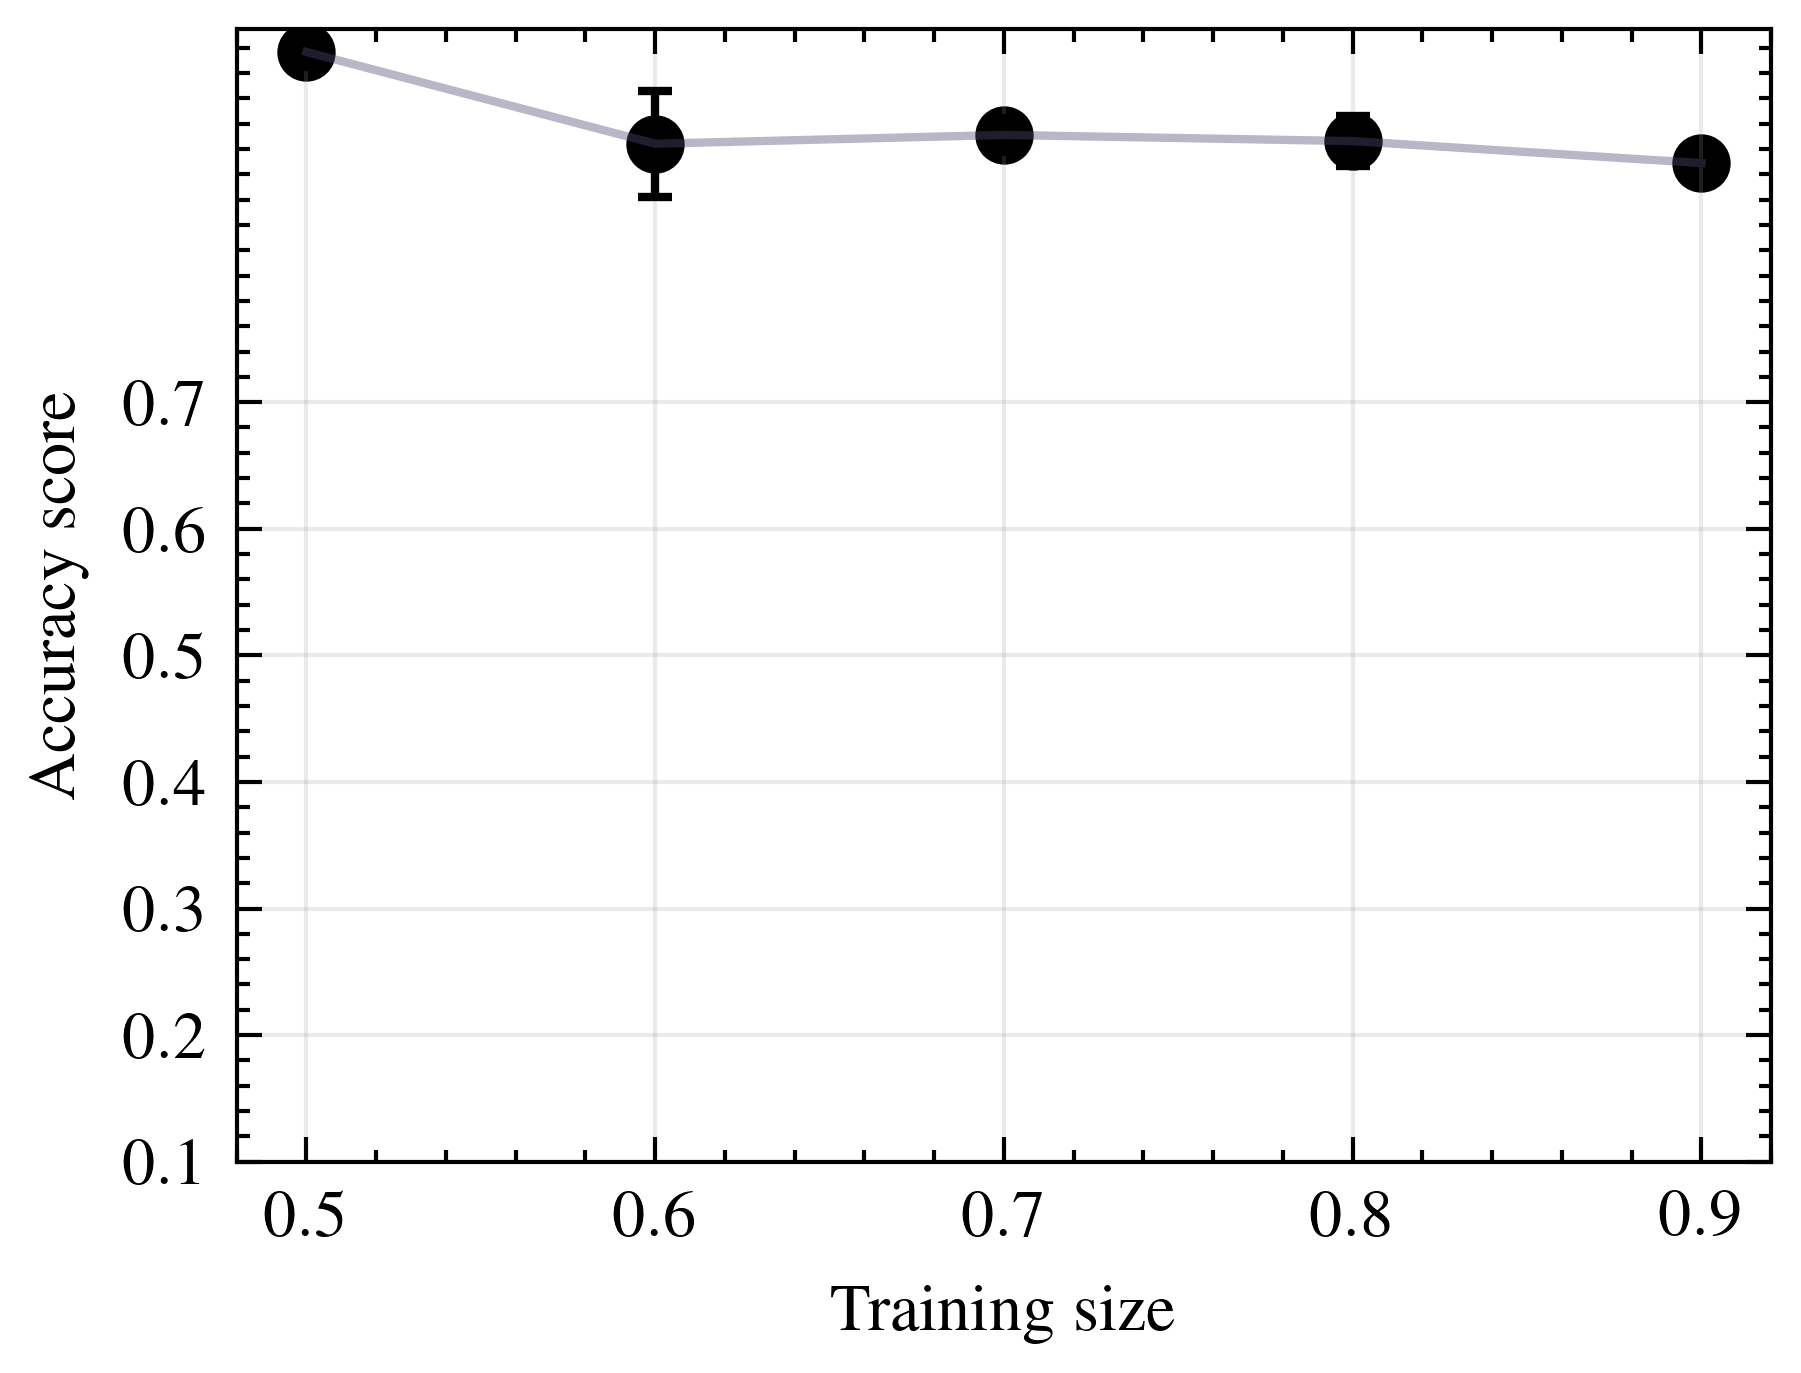

In [76]:
plt.figure()
plt.scatter(ratios, avg_list)
plt.errorbar(ratios, avg_list, yerr= seom_list, capsize = 2, ls='none',)
plt.plot(ratios, avg_list, linestyle='-', color=(0.3, 0.3, 0.45 ,.4))
plt.yticks(np.arange(0.1, 0.8, 0.1))

plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.grid(b=True, color='#999999', linestyle='-', alpha=0.2)
# plt.savefig('./figures/'+fldr+'/'+str(run_num)+'runs_'+str(epochs)+'epochs_'+str(batch_size)+'batch_size_'+str(lr)+'lr_'+str(seed_val)+'seed_val_.png')
plt.show()

# Variable: epochs
epochs_list = [1,2,3,4,5,6,7,8]
****Classifier Parameters****
batch_size = 16
seed_val = 42
lr = 10e-5   # args.learning rate - default is 5e-5
****Training Parameters****
run_num = 20
ratio = 0.9

In [ ]:
fldr = 'bert_argumentlevel/year1year2/' 

epochs_list = [1,2,3,4,5,6,7,8]

avg_list = []
seom_list = []

for value in epochs_list:
    df = pd.read_pickle('./Pickledfiles/'+fldr+'0.9trainratio_20runs_'+str(value)+'epochs_16batch_size_0.0001lr_42seed_val_.pkl')
    # print(df.loc[value])
    
    accy_list = (df.loc[value])['Valid. Accur.'].tolist() # index is named as 'epoch'
    # print('epoch==', value, ':',accy_list)

    # append average and standard error of mean to lists
    avg_list.append(np.average(accy_list))
    seom_list.append( np.std(accy_list, ddof=1) / np.sqrt(np.size(accy_list)) ) 
# print(avg_list, seom_list)


plt.figure()
plt.scatter(epochs_list, avg_list, c=(0, 0, 0, 1))
plt.errorbar(epochs_list, avg_list, yerr= seom_list, color=(0, 0, 0, 1),fmt='none', capsize = 2)
plt.plot(epochs_list, avg_list, linestyle='dashed', color=(0.3, 0.3, 0.45 ,.4))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.savefig('./figures/'+fldr+'/vary_epochs_0.9trainratio_20runs_1-5epochs_16batch_size_0.0001lr_42seed_val_.png')
plt.show()

# Variable: run number / iterations
run_num = [1,2,3,4,...,20]

epochs = 1
batch_size = 16
seed_val = 42
lr = 10e-5   # args.learning rate - default is 5e-5
ratio = 0.9

In [ ]:
fldr = 'bert_argumentlevel/year2/'
run_num_list = np.arange(1,21,1)    #[1,2,3,4,...,20]

avg_list = []
seom_list = []
for run_num in run_num_list:
    df = pd.read_pickle('./Pickledfiles/'+fldr+'0.9trainratio_'+str(run_num)+'runs_1epochs_16batch_size_0.0001lr_42seed_val_.pkl')
    accy_list = df['Valid. Accur.'].tolist() 
    

    # append average and standard error of mean to lists
    avg_list.append(np.average(accy_list))
    seom_list.append( np.std(accy_list, ddof=1) / np.sqrt(np.size(accy_list)) ) 
seom_list = [0 if math.isnan(x) else x for x in seom_list]
print(avg_list, seom_list)


plt.figure()
plt.scatter(run_num_list, avg_list, c=(0, 0, 0, 1))
plt.errorbar(run_num_list, avg_list, yerr= seom_list, color=(0, 0, 0, 1),fmt='none', capsize = 2)
plt.plot(run_num_list, avg_list, linestyle='dashed', color=(0.3, 0.3, 0.45 ,.4))
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.savefig('./figures/'+fldr+'vary_run_num_0.9trainratio_'+str(run_num)+'runs_1epochs_16batch_size_0.0001lr_42seed_val_.png')
plt.show()

# Variable: learning rates
# set epochs
epochs = 4
# set batch size
batch_size = 16
# set random seed
seed_val = 42
# set learnning rate
# lr = 10e-5   # args.learning rate - default is 5e-5
lr_list = [1e0,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]


# ****Training Parameters****
# set the number of loops 
run_num = 2
# set training data ratio
ratio = 0.9
# ratio_list = [0.8,0.9]
